In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")


import acquire

In [87]:
df= acquire.get_telco_data()

Using cached csv


In [88]:
df.head(3)

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check


In [89]:
df.shape

(7043, 24)

In [90]:
df.drop_duplicates()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.4,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.90,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Fiber optic,Month-to-month,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,2,1,9987-LUTYD,Female,0,No,No,13,Yes,...,Yes,No,No,No,55.15,742.9,No,DSL,One year,Mailed check
7039,1,1,2,9992-RRAMN,Male,0,Yes,No,22,Yes,...,No,No,Yes,Yes,85.10,1873.7,Yes,Fiber optic,Month-to-month,Electronic check
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,...,No,No,No,Yes,50.30,92.75,No,DSL,Month-to-month,Mailed check
7041,2,3,1,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,Yes,No,Yes,No,67.85,4627.65,No,DSL,Two year,Mailed check


In [91]:
drop_columns = ['payment_type_id', 'internet_service_type_id', 'contract_type_id']

df = df.drop(columns = drop_columns)

In [92]:
df.head(3)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   online_security        7043 non-null   object 
 9   online_backup          7043 non-null   object 
 10  device_protection      7043 non-null   object 
 11  tech_support           7043 non-null   object 
 12  streaming_tv           7043 non-null   object 
 13  streaming_movies       7043 non-null   object 
 14  paperless_billing      7043 non-null   object 
 15  mont

In [94]:
df.total_charges = pd.to_numeric(df.total_charges, errors = 'coerce')

In [95]:
df.total_charges.isna().value_counts()

False    7032
True       11
Name: total_charges, dtype: int64

In [96]:
# Didn't mess anything up?..
df.head(3)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.30,No,DSL,One year,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.40,No,DSL,Month-to-month,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check


In [97]:
# Dummies that are easily binary
dummy_df1 = pd.get_dummies(df[['gender', 'partner', 'dependents', 'online_security', 'online_backup', 'phone_service',
                              'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 
                              'paperless_billing', 'churn']], drop_first = True)


# Dummies that have multiple outcomes (more than 2)
dummy_df2 = pd.get_dummies(df[['multiple_lines', 'contract_type', 'internet_service_type', 'payment_type']])

In [98]:
# Drop duplicates after work above
drop_cols = ['gender', 'partner', 'dependents', 'online_security', 'phone_service',
             'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
             'streaming_movies', 'paperless_billing', 'churn']
df = df.drop(columns = drop_cols)

df.head()

,customer_id,senior_citizen,tenure,multiple_lines,monthly_charges,total_charges,internet_service_type,contract_type,payment_type
0,0002-ORFBO,0,9,No,65.6,593.30,DSL,One year,Mailed check
1,0003-MKNFE,0,9,Yes,59.9,542.40,DSL,Month-to-month,Mailed check
2,0004-TLHLJ,0,4,No,73.9,280.85,Fiber optic,Month-to-month,Electronic check
3,0011-IGKFF,1,13,No,98.0,1237.85,Fiber optic,Month-to-month,Electronic check
4,0013-EXCHZ,1,3,No,83.9,267.40,Fiber optic,Month-to-month,Mailed check


In [99]:
df = pd.concat([df, dummy_df1, dummy_df2], axis = 1)

In [100]:
df.head(3)

,customer_id,senior_citizen,tenure,multiple_lines,monthly_charges,total_charges,internet_service_type,contract_type,payment_type,gender_Male,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,0,9,No,65.6,593.30,DSL,One year,Mailed check,0,...,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,0,9,Yes,59.9,542.40,DSL,Month-to-month,Mailed check,1,...,1,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,0,4,No,73.9,280.85,Fiber optic,Month-to-month,Electronic check,1,...,1,0,0,0,1,0,0,0,1,0


In [101]:
df.columns.tolist()

['customer_id',
 'senior_citizen',
 'tenure',
 'multiple_lines',
 'monthly_charges',
 'total_charges',
 'internet_service_type',
 'contract_type',
 'payment_type',
 'gender_Male',
 'partner_Yes',
 'dependents_Yes',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No internet service',
 'online_backup_Yes',
 'phone_service_Yes',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No internet service',
 'streaming_tv_Yes',
 'streaming_movies_No internet service',
 'streaming_movies_Yes',
 'paperless_billing_Yes',
 'churn_Yes',
 'multiple_lines_No',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'contract_type_Month-to-month',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_DSL',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'payment_type_Bank transfer (automatic)',
 'payment_type_Credit card (automatic)'

In [102]:
df.rename(columns ={ 'gender_Male': 'is_male',
                    'partner_Yes': 'has_partner',
                    'dependents_Yes': 'has_dependents',
                    'online_security_Yes': 'online_security',
                    'online_backup_Yes': 'online_backup',
                    'phone_service_Yes': 'phone_service',
                    'device_protection_Yes': 'device_protection',
                    'tech_support_Yes': 'tech_support',
                    'streaming_tv_Yes': 'streaming_tv',
                    'streaming_movies_Yes': 'streaming_movies',
                    'paperless_billing_Yes': 'paperless_billing',
                    'churn_Yes': 'churn',
                    'multiple_lines_No': 'one_line',
                    'multiple_lines_No phone service': 'no_phone_service',
                    'multiple_lines_Yes': 'has_multiple_lines',
                    'contract_type_Month-to-month': 'month_to_month',
                    'contract_type_One year': 'one_year',
                    'contract_type_Two year': 'two_year',
                    'internet_service_type_DSL': 'dsl_int',
                    'internet_service_type_Fiber optic': 'fiber_int',
                    'internet_service_type_None': 'no_internet',
                    'payment_type_Bank transfer (automatic)': 'bt_auto',
                    'payment_type_Credit card (automatic)': 'cc_auto',
                    'payment_type_Electronic check': 'elecc_nonauto',
                    'payment_type_Mailed check': 'mailc_nonauto'}, 
          inplace = True)

In [103]:
df.columns.tolist()

['customer_id',
 'senior_citizen',
 'tenure',
 'multiple_lines',
 'monthly_charges',
 'total_charges',
 'internet_service_type',
 'contract_type',
 'payment_type',
 'is_male',
 'has_partner',
 'has_dependents',
 'online_security_No internet service',
 'online_security',
 'online_backup_No internet service',
 'online_backup',
 'phone_service',
 'device_protection_No internet service',
 'device_protection',
 'tech_support_No internet service',
 'tech_support',
 'streaming_tv_No internet service',
 'streaming_tv',
 'streaming_movies_No internet service',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'one_line',
 'no_phone_service',
 'has_multiple_lines',
 'month_to_month',
 'one_year',
 'two_year',
 'dsl_int',
 'fiber_int',
 'no_internet',
 'bt_auto',
 'cc_auto',
 'elecc_nonauto',
 'mailc_nonauto']

In [104]:
df.head(3)

,customer_id,senior_citizen,tenure,multiple_lines,monthly_charges,total_charges,internet_service_type,contract_type,payment_type,is_male,...,month_to_month,one_year,two_year,dsl_int,fiber_int,no_internet,bt_auto,cc_auto,elecc_nonauto,mailc_nonauto
0,0002-ORFBO,0,9,No,65.6,593.30,DSL,One year,Mailed check,0,...,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,0,9,Yes,59.9,542.40,DSL,Month-to-month,Mailed check,1,...,1,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,0,4,No,73.9,280.85,Fiber optic,Month-to-month,Electronic check,1,...,1,0,0,0,1,0,0,0,1,0


## Split Data

In [105]:
def split_telco(df):
    '''
    Function for splitting data. The first split will be to reserve 20%
    of all data for test. The remaining 80% will be split into 70/30 for
    the train and validate, respectively. This function will return the
    train, validate, and test DataFrames.
    '''
 
    train_validate, test = train_test_split(df, test_size=.2, 
                                            random_state=123, 
                                            stratify=df.churn)

    train, validate = train_test_split(train_validate, test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.churn)
    return train, validate, test

In [106]:
# Verify the split was done properly looking at the shape of each
train, validate, test = split_telco(df)

train.shape, validate.shape, test.shape

((3943, 40), (1691, 40), (1409, 40))

## Exploration

In [107]:
# Specify numeric and categorical columns
num_cols = ['senior_citizen', 'multiple_lines', 'contract_type', 
            'internet_service_type', 'payment_type', 'is_male', 
            'has_partner', 'has_dependents', 'online_security', 
            'online_backup', 'device_protection', 'tech_support',
            'streaming_tv', 'streaming_movies', 'paperless_billing', 
            'churn']


cat_cols = list(df.dtypes[df.dtypes == 'object'].index)


Start with a few histograms to see the infomation better. Keep in mind most numberic columns are binary.

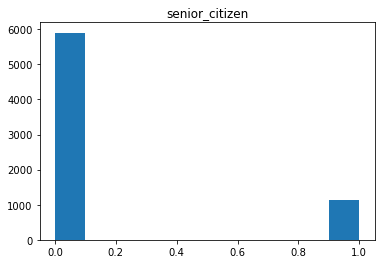

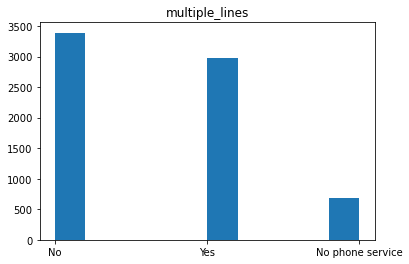

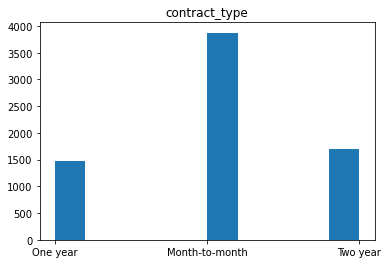

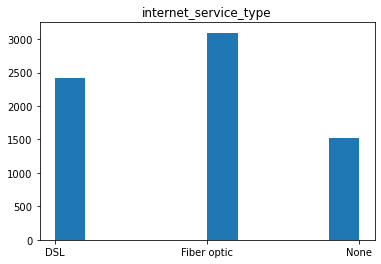

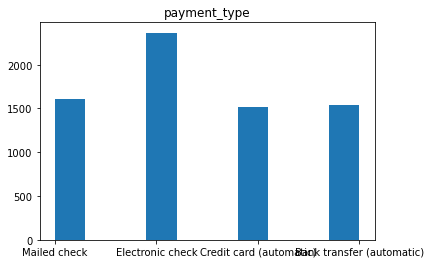

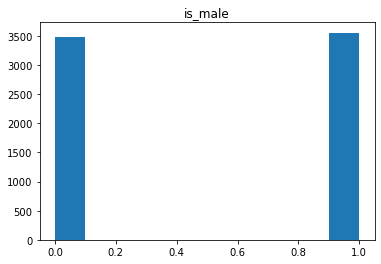

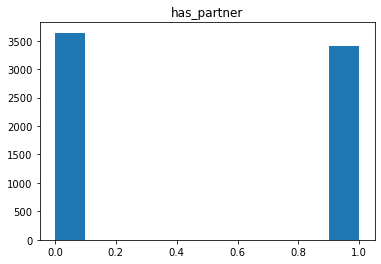

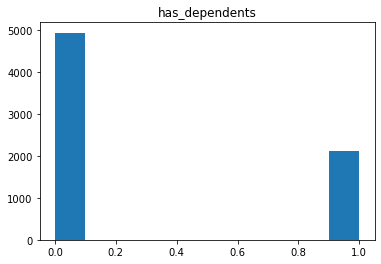

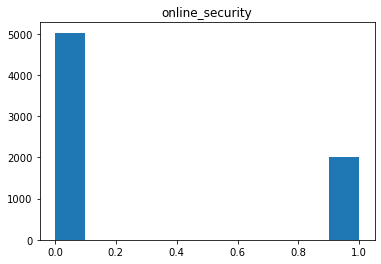

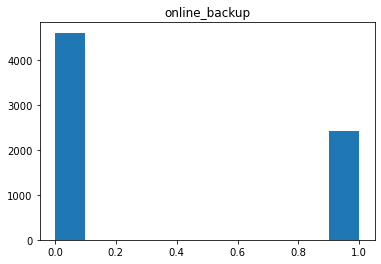

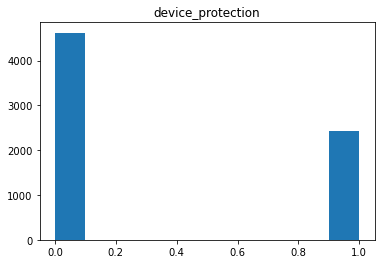

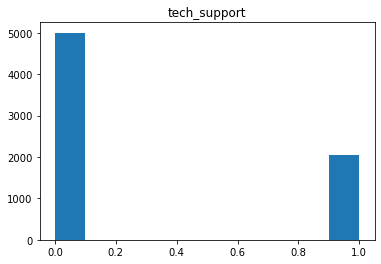

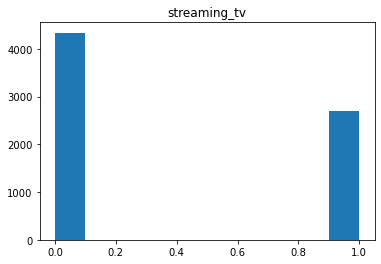

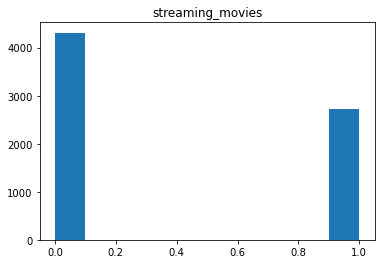

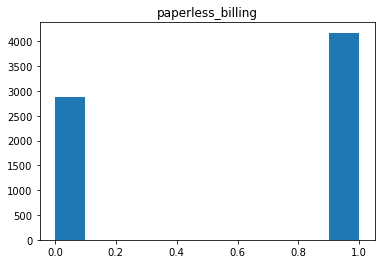

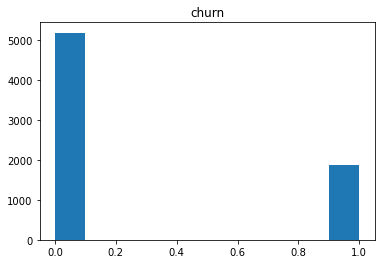

In [108]:
for col in num_cols: 
    plt.hist(df[col])
    plt.title(col)
    plt.show()

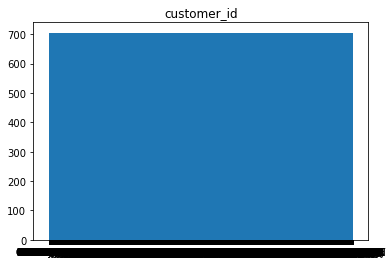

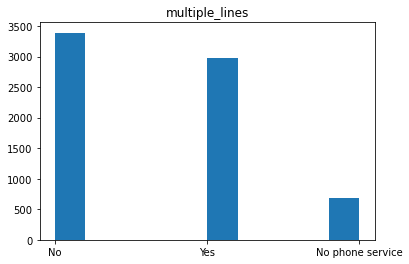

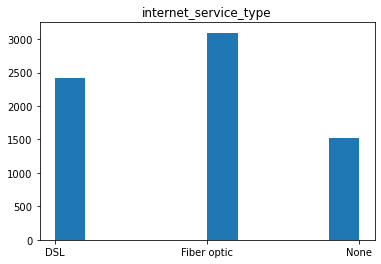

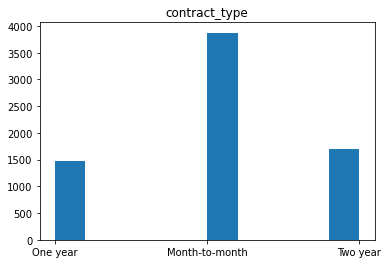

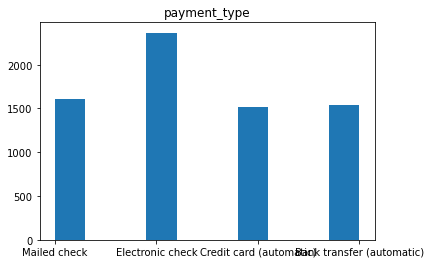

In [109]:
for col in cat_cols: 
    plt.hist(df[col])
    plt.title(col)
    plt.show()

## Questions...


1.) What categories are the highest in terms of correlation with churn?

        - month-to-month contracts
        - fiber optic internet
        - electronic check
        - monthly charges
        - paperless billing
        - senior citizens

2.) How far into tenure do churners leave?

        - Most churning happens in the first year

3.) What is the difference in churn between contract type?
 
           Total churners in each group
           
        - Month-to-month.............2170
        - Two year....................924
        - One year....................849

4.) Does internet type really influence churn?

        - Fiber optic internet has a much higher 
          influence on churn than DSL does and
          both influence churn MUCH more than
          no internet service at all.


### Questions to use in Final
#### Question #1 - Do churning customers pay the same amount on average as other customers?

#### Question #2 - In what year do most customers churn?

#### Question #3 - Do month-to-month customers really churn at a higher rate than all others?

#### Question #4 - Is churn independent of internet service type?


Text(0.5, 1.0, 'Rankings of Correlation to Churn')

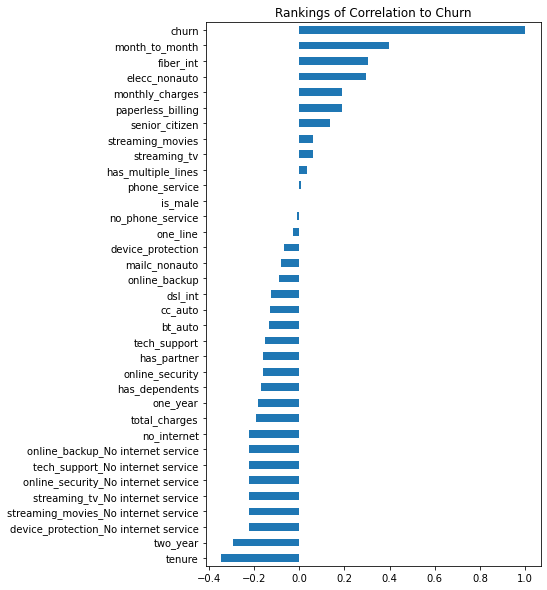

In [110]:
# Take a look at how all categories correlate to churn with a horizontal
# bar plot.

train.corr()['churn'].sort_values().plot(kind='barh', figsize=(6,10))
plt.title('Rankings of Correlation to Churn')

            customer_id_counts
7503-MIOGA                   1
9112-WSNPU                   1
9504-YAZWB                   1
5940-AHUHD                   1
6244-BESBM                   1
...                        ...
9239-GZHZE                   1
0112-QAWRZ                   1
5088-QZLRL                   1
0174-QRVVY                   1
9681-KYGYB                   1

[3943 rows x 1 columns]


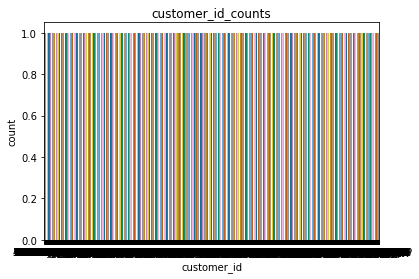

                  multiple_lines_counts
No                                 1881
Yes                                1697
No phone service                    365


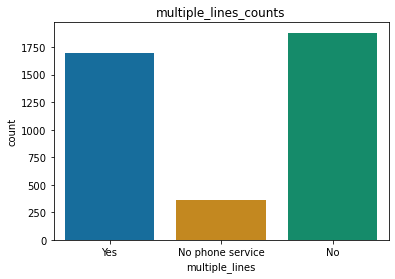

             internet_service_type_counts
Fiber optic                          1745
DSL                                  1349
None                                  849


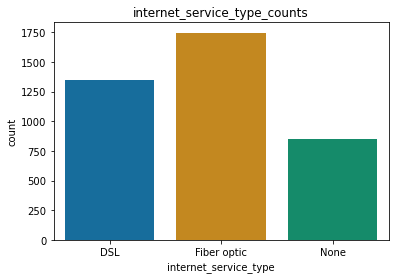

                contract_type_counts
Month-to-month                  2170
Two year                         924
One year                         849


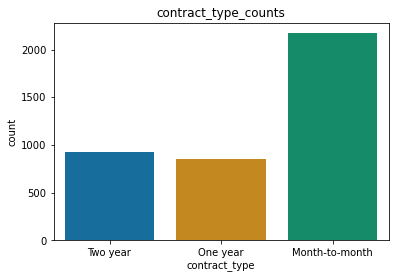

                           payment_type_counts
Electronic check                          1328
Mailed check                               877
Bank transfer (automatic)                  873
Credit card (automatic)                    865


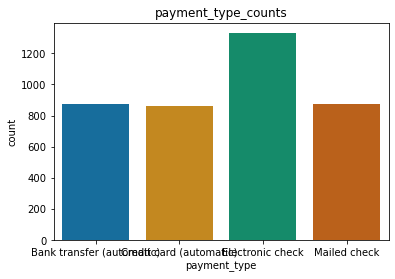

In [111]:
# Take a look at categorical columns
for col in cat_cols:
    
    # Display the counts of each category
    print(pd.DataFrame(train[col].value_counts())
          .rename(columns={col: f'{col}_counts'}))    
    # Plot a barplot to represent the counts
    sns.countplot(data=train,
                  x=col,
                 palette = 'colorblind')
    plt.title(f'{col}_counts')
    plt.show()

   senior_citizen_counts
0                   3301
1                    642


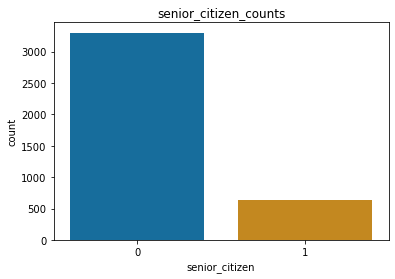

                  multiple_lines_counts
No                                 1881
Yes                                1697
No phone service                    365


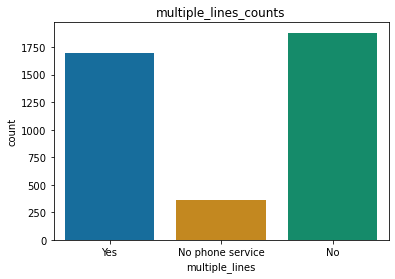

                contract_type_counts
Month-to-month                  2170
Two year                         924
One year                         849


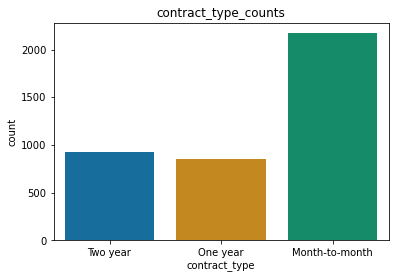

             internet_service_type_counts
Fiber optic                          1745
DSL                                  1349
None                                  849


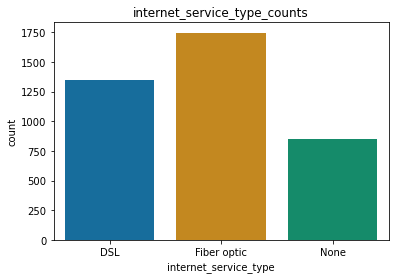

                           payment_type_counts
Electronic check                          1328
Mailed check                               877
Bank transfer (automatic)                  873
Credit card (automatic)                    865


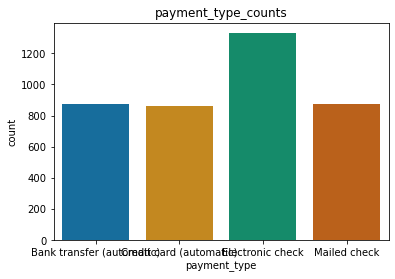

   is_male_counts
1            2007
0            1936


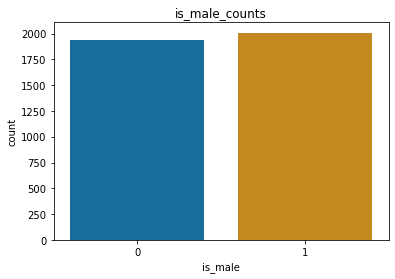

   has_partner_counts
0                2024
1                1919


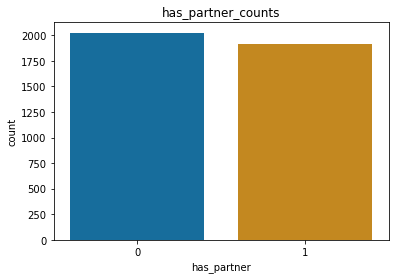

   has_dependents_counts
0                   2730
1                   1213


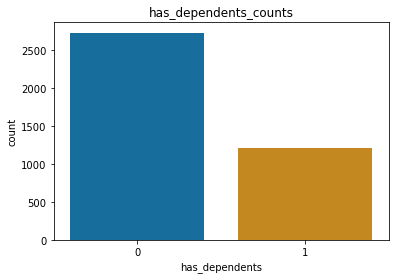

   online_security_counts
0                    2795
1                    1148


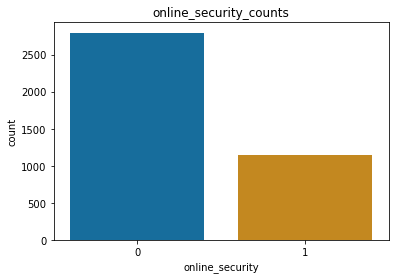

   online_backup_counts
0                  2551
1                  1392


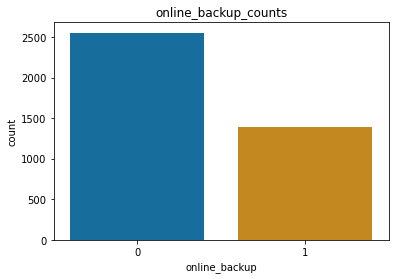

   device_protection_counts
0                      2541
1                      1402


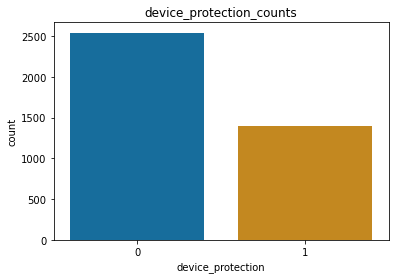

   tech_support_counts
0                 2788
1                 1155


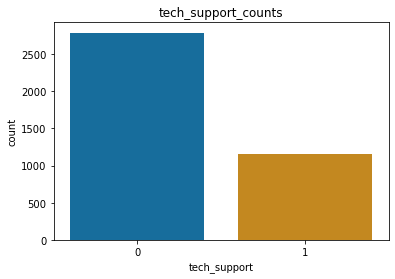

   streaming_tv_counts
0                 2391
1                 1552


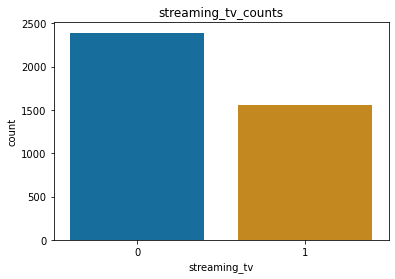

   streaming_movies_counts
0                     2378
1                     1565


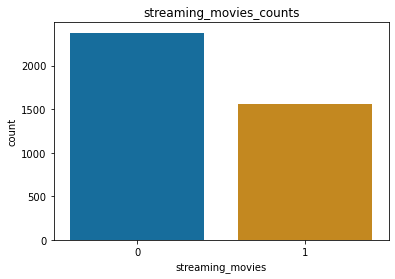

   paperless_billing_counts
1                      2345
0                      1598


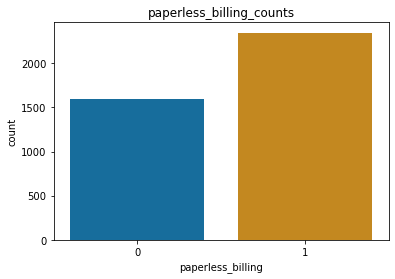

   churn_counts
0          2897
1          1046


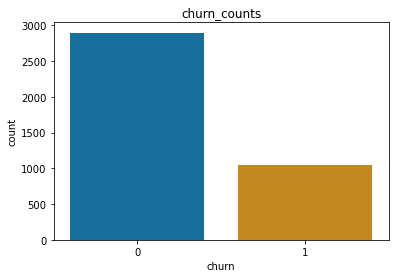

In [112]:
# Take a look at numerical columns (including overall churn)
for col in num_cols:
    
    # Display the counts of each category
    print(pd.DataFrame(train[col].value_counts())
          .rename(columns={col: f'{col}_counts'}))    
    # Plot a barplot to represent the counts
    sns.countplot(data=train,
                  x=col,
                 palette = 'colorblind')
    plt.title(f'{col}_counts')
    plt.show()

### 1. Do customers that churn pay more than other customers?

<AxesSubplot:xlabel='monthly_charges', ylabel='Count'>

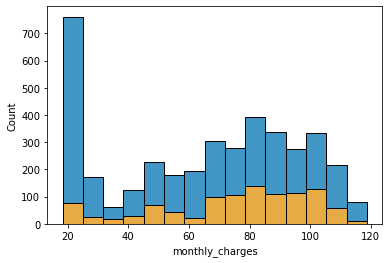

In [130]:
sns.histplot(train, 
             x=train.monthly_charges, 
             hue='churn', 
             multiple ='stack',
            legend = False,
            palette = 'colorblind')


In [131]:
alpha = 0.5
train.churn.value_counts()

0    2897
1    1046
Name: churn, dtype: int64

In [132]:
train_churn = train[train.churn==1].monthly_charges
overall_mean = train.monthly_charges.mean()

t,p = stats.ttest_1samp(train_churn, overall_mean)

if p/2 > alpha:
    print("We fail to reject the Null Hypothesis")
elif t < 0:
    print("We fail to reject the Null Hypothesis")
else:
    print("We reject the Null Hypothesis")

We reject the Null Hypothesis


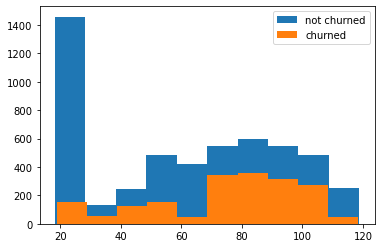

In [133]:
churned = df[df.churn == 1]
not_churn = df[df.churn == 0]
plt.hist(not_churn.monthly_charges, label = 'not churned')
plt.hist(churned.monthly_charges, label = 'churned')
plt.legend()
plt.show()

### 2. In what year do most customers churn?

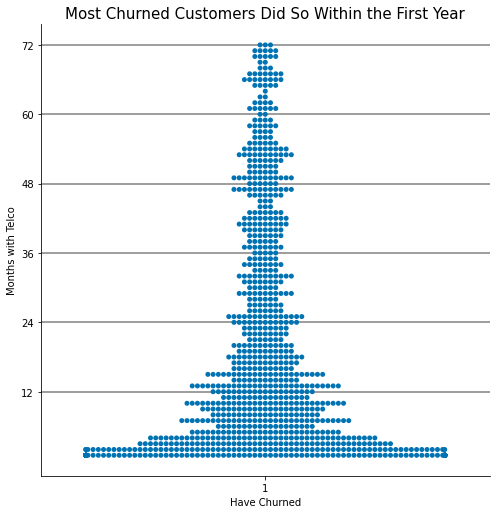

In [134]:
sns.catplot( x= 'churn', y = 'tenure',
            kind = 'swarm',
            palette = 'colorblind', size = 7, aspect = 1,
            data = train[train.churn == 1])
plt.title('Most Churned Customers Did So Within the First Year', fontsize = 15)
plt.xlabel('Have Churned')
plt.ylabel('Months with Telco')
plt.yticks([12,24,36,48,60,72])
plt.axhline(y=12, linestyle = '-', color = 'grey')
plt.axhline(y=24, linestyle = '-', color = 'grey')
plt.axhline(y=36, linestyle = '-', color = 'grey')
plt.axhline(y=48, linestyle = '-', color = 'grey')
plt.axhline(y=60, linestyle = '-', color = 'grey')
plt.axhline(y=72, linestyle = '-', color = 'grey')

### 3. Do month-to-month customers really churn at a higher rate than all others?

Text(0, 0.5, 'Customer Count')

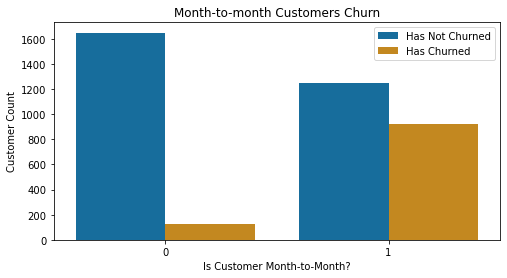

In [135]:
churn_df = pd.DataFrame({'Yes':train.churn.sum(),
                         'No':(train.churn == 0).sum()}, 
                         index = ['Churn']).T
labels = churn_df.index
plt.figure(figsize = (8, 4))
sns.countplot(x='month_to_month', 
              hue = 'churn', 
              palette = 'colorblind', 
              data = train)
plt.title('Month-to-month Customers Churn')
plt.legend(labels = ['Has Not Churned', 'Has Churned'])
plt.xlabel('Is Customer Month-to-Month?')
plt.ylabel('Customer Count')


### Is churn independent of internet service type?

In [136]:
# avg_churn = train.churn.mean()
# internet = sns.catplot(data=train, 
#             x='internet_type', 
#             y='churn', 
#             kind='bar')
# plt.axhline(avg_churn, label='overall churn rate')
# internet.set_xticklabels(['DSL', 'Fiber', 'No Internet'])
# plt.show()

Text(0, 0.5, 'Customer Count')

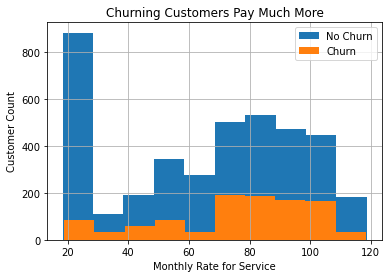

In [137]:
train.monthly_charges.hist()
churn_sample = train[train.churn==1].monthly_charges
churn_sample.hist()
plt.title('Churning Customers Pay Much More')
plt.legend(labels = ['No Churn', 'Churn'])
plt.xlabel('Monthly Rate for Service')
plt.ylabel('Customer Count')

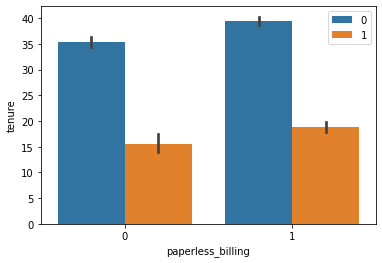

In [138]:
sns.barplot(x='paperless_billing', y='tenure', hue='churn', data=df,)
churn_mean = df.churn.mean()
plt.legend()
plt.show()

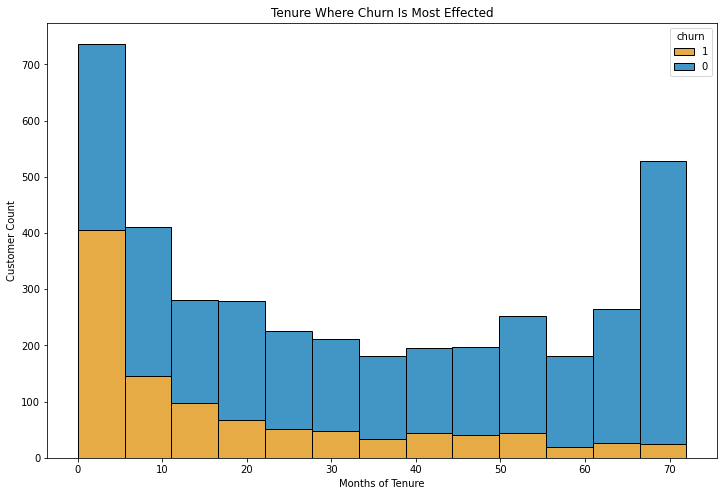

In [139]:
plt.figure(figsize=(12,8))
# Distribution of Tenure
sns.histplot(train,
             x=train.tenure,
             hue='churn',
             multiple = 'stack',
             palette = 'colorblind',
             legend=False
             )
plt.title("Tenure Where Churn Is Most Effected")
plt.xlabel('Months of Tenure')
plt.ylabel('Customer Count')
plt.legend(title = 'churn', loc='upper right',labels=[1,0])

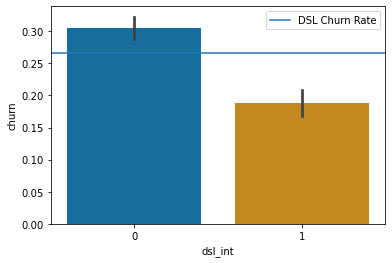

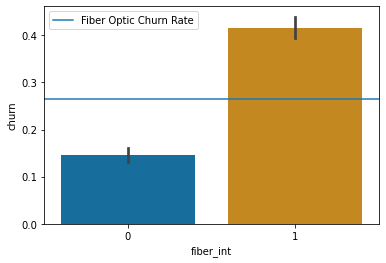

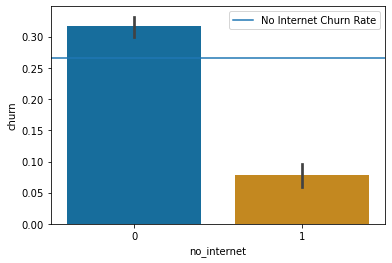

In [140]:
plt.title('')
sns.barplot(x="dsl_int", 
            y="churn", 
            data=train, 
            palette='colorblind')
population_churn_rate = train.churn.mean()
plt.axhline(population_churn_rate, label="DSL Churn Rate")
plt.legend()
plt.show()


plt.title('')
sns.barplot(x="fiber_int", 
            y="churn", 
            data=train, 
            palette='colorblind')
population_churn_rate = train.churn.mean()
plt.axhline(population_churn_rate, label="Fiber Optic Churn Rate")
plt.legend()
plt.show()


plt.title('')
sns.barplot(x="no_internet", 
            y="churn", 
            data=train, 
            palette='colorblind')
population_churn_rate = train.churn.mean()
plt.axhline(population_churn_rate, label="No Internet Churn Rate")
plt.legend()
plt.show()

In [141]:
df.head(1)

,customer_id,senior_citizen,tenure,multiple_lines,monthly_charges,total_charges,internet_service_type,contract_type,payment_type,is_male,...,month_to_month,one_year,two_year,dsl_int,fiber_int,no_internet,bt_auto,cc_auto,elecc_nonauto,mailc_nonauto
0,0002-ORFBO,0,9,No,65.6,593.3,DSL,One year,Mailed check,0,...,0,1,0,1,0,0,0,0,0,1


## Modeling

In [142]:
train.churn.value_counts()

0    2897
1    1046
Name: churn, dtype: int64

In [143]:
train['baseline'] = 0
train.head()

,customer_id,senior_citizen,tenure,multiple_lines,monthly_charges,total_charges,internet_service_type,contract_type,payment_type,is_male,...,one_year,two_year,dsl_int,fiber_int,no_internet,bt_auto,cc_auto,elecc_nonauto,mailc_nonauto,baseline
5310,7503-MIOGA,1,72,Yes,89.85,6697.35,DSL,Two year,Bank transfer (automatic),0,...,0,1,1,0,0,1,0,0,0,0
3790,5329-KRDTM,1,72,Yes,77.35,5396.25,DSL,Two year,Credit card (automatic),1,...,0,1,1,0,0,0,1,0,0,0
4398,6199-IWKGC,1,46,Yes,100.25,4753.85,Fiber optic,One year,Electronic check,0,...,1,0,0,1,0,0,0,1,0,0
2635,3748-FVMZZ,0,4,No phone service,40.05,162.45,DSL,Month-to-month,Electronic check,1,...,0,0,1,0,0,0,0,1,0,0
2986,4280-DLSHD,0,8,No,54.75,445.85,DSL,Month-to-month,Mailed check,1,...,0,0,1,0,0,0,0,0,1,0


In [144]:
baseline_accuracy = (train.baseline == train.churn).mean()
baseline_accuracy

0.7347197565305605

In [145]:
#Define features used for the model
x_cols =['monthly_charges',
         'month_to_month',
         'fiber_int',
         'tenure',
         'dsl_int',
         'no_internet']

In [146]:
# Set x_ and y_train
x_train = train[x_cols]
y_train = train[['churn']]

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

x_train = train[x_cols]
y_train = train[['churn']]

x_validate = validate[x_cols]
y_validate = validate[['churn']]

x_test = test[x_cols]
y_test = test[['churn']]

In [147]:
y_train.mode()

,churn
0,0


In [148]:
# Sanity Checks
x_train.head(3)

,monthly_charges,month_to_month,fiber_int,tenure,dsl_int,no_internet
5310,89.85,0,0,72,1,0
3790,77.35,0,0,72,1,0
4398,100.25,0,1,46,0,0


In [149]:
y_train.head(3)

,churn
5310,0
3790,0
4398,0


## Logistic Regression

In [150]:
logit = LogisticRegression(random_state=123)

In [151]:
logit.fit(x_train, y_train)

LogisticRegression(random_state=123)

In [152]:
# # List of Features
# features = x_train.columns.tolist()
# features


In [153]:
weights = logit.coef_.flatten()
weights

array([ 0.00451771,  1.05121165,  0.64795297, -0.0337212 , -0.4163369 ,
       -1.28820537])

In [154]:
pd.DataFrame(weights, x_cols).reset_index().rename(columns={'index': 'x_cols', 0: 'weight'})

,x_cols,weight
0,monthly_charges,0.004518
1,month_to_month,1.051212
2,fiber_int,0.647953
3,tenure,-0.033721
4,dsl_int,-0.416337
5,no_internet,-1.288205


In [155]:
logit = LogisticRegression(C=1, random_state=123)
logit.fit(x_train, y_train)
# Accuracy on train for  KNN:
print(f'Accuracy of Logistic Regression on the training set is {(logit.score(x_train, y_train)):.2%}')
# Accurcy on validate for KNN:
print(f'Accuracy of Logistic Regression on the validate set is {(logit.score(x_validate, y_validate)):.2%}')

Accuracy of Logistic Regression on the training set is 78.27%
Accuracy of Logistic Regression on the validate set is 79.42%


## Decision Tree

In [156]:
tree = DecisionTreeClassifier(max_depth = 2)

In [157]:
tree.fit(x_train,y_train.churn)

DecisionTreeClassifier(max_depth=2)

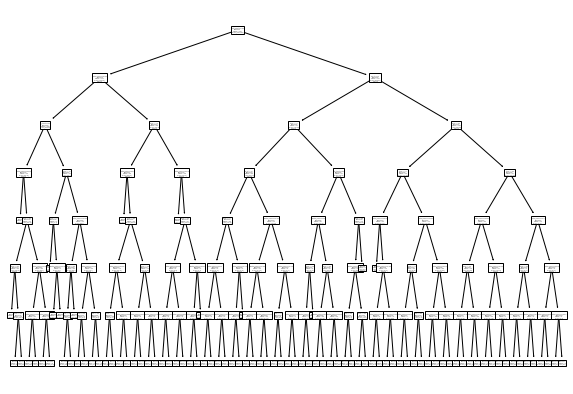

In [158]:
tree = DecisionTreeClassifier(max_depth = 7)
tree.fit(x_train,y_train.churn)
# Show Decision Tree
plt.figure(figsize=(10, 7))
plot_tree(tree, 
          feature_names=x_train.columns, 
          class_names=y_train.churn.astype(str))
plt.show()

In [159]:
y_pred = tree.predict(x_train)
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).T


,precision,recall,f1-score,support
0,0.861324,0.894028,0.877371,2897.000000
1,0.672009,0.601338,0.634712,1046.000000
accuracy,0.816383,0.816383,0.816383,0.816383
macro avg,0.766666,0.747683,0.756042,3943.000000
weighted avg,0.811102,0.816383,0.812999,3943.000000


In [160]:
#Create the model
tree = DecisionTreeClassifier(max_depth=7, random_state=123)
# Fit the model
tree.fit(x_train, y_train)
# Evaluate the model
# Accuracy on train for the Decision Tree:
print(f'Accuracy of Decision Tree Classifier on the training set is {(tree.score(x_train, y_train)):.2%}')
# Accurcy on validate for the Decision Tree:
print(f'Accuracy of Decision Tree Classifier on the validate set is {(tree.score(x_validate, y_validate)):.2%}')

Accuracy of Decision Tree Classifier on the training set is 81.64%
Accuracy of Decision Tree Classifier on the validate set is 78.12%


## Random Forest

In [161]:
# Evaluate Random Forest models on train & validate set by looping through different values for max_depth and min_samples_leaf hyperparameters
# create empty list for which to append metrics from each loop
scores = []
# set value for range
max_value = range(1,21)
# create loop for range 1-20
for i in max_value:
    # set depth & n_samples to value for current loop
    depth = i
    n_samples = i
    # define the model setting hyperparameters to values for current loop
    rf = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)
    # fit the model on train
    rf = rf.fit(x_train, y_train)
    # use the model and evaluate performance on train
    in_sample_accuracy = rf.score(x_train, y_train)
    # use the model and evaluate performance on validate
    out_of_sample_accuracy = rf.score(x_validate, y_validate)
    # create output of current loop’s hyperparameters and accuracy to append to metrics
    output = {
        'min_samples_per_leaf': n_samples,
        'max_depth': depth,
        'train_accuracy': in_sample_accuracy,
        'validate_accuracy': out_of_sample_accuracy
    }
    scores.append(output)
# convert metrics list to a dataframe for easy reading
df = pd.DataFrame(scores)
# add column to assess the difference between train & validate accuracy
df['difference'] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,1,1,0.734720,0.734477,0.000243
1,2,2,0.788740,0.790065,-0.001326
2,3,3,0.788740,0.790065,-0.001326
3,4,4,0.795334,0.803075,-0.007742
4,5,5,0.801167,0.798936,0.002231
5,6,6,0.804971,0.794205,0.010766
6,7,7,0.809029,0.794796,0.014233
7,8,8,0.819173,0.787108,0.032065
8,9,9,0.822977,0.790065,0.032912
9,10,10,0.824499,0.790656,0.033843


In [162]:
# Build the model with max depth of 10
rf = RandomForestClassifier(max_depth=10,min_samples_leaf=10,random_state=1349)
# Fit the model
rf.fit(x_train, y_train)
# Accuracy on train for the Random Forest:
print(f'Accuracy of Random Forest on the training set is {(rf.score(x_train, y_train)):.2%}')
# Accurcy on validate for the Random Forest:
print(f'Accuracy of Random Forest on the validate set is {(rf.score(x_validate, y_validate)):.2%}')

Accuracy of Random Forest on the training set is 82.45%
Accuracy of Random Forest on the validate set is 79.12%


## K's Nearest Neighbors

In [163]:
knn = KNeighborsClassifier(n_neighbors=5)

In [164]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [165]:
y_pred = knn.predict(x_train)

In [166]:
print('Accuracy of KNN on training set: {:.2f}'
     .format(knn.score(x_train, y_train)))

Accuracy of KNN on training set: 0.83


In [167]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      2897
           1       0.71      0.61      0.65      1046

    accuracy                           0.83      3943
   macro avg       0.79      0.76      0.77      3943
weighted avg       0.82      0.83      0.83      3943



In [168]:
x_val_train = validate[x_cols]
y_val_train = validate[['churn']]
x_val_train.head()

,monthly_charges,month_to_month,fiber_int,tenure,dsl_int,no_internet
720,69.90,1,1,1,0,0
5832,43.75,0,0,22,1,0
4378,94.65,1,1,67,0,0
5553,20.40,0,0,14,0,1
482,101.70,1,1,4,0,0


In [169]:
# Create the model
knn = KNeighborsClassifier(n_neighbors=5)
# Fit the model
knn.fit(x_train,y_train)
# Accuracy on train for  KNN:
print(f'Accuracy of KNN on the training set is {(knn.score(x_train, y_train)):.2%}')
# Accurcy on validate for KNN:
print(f'Accuracy of KNN on the validate set is {(knn.score(x_validate, y_validate)):.2%}')

Accuracy of KNN on the training set is 83.01%
Accuracy of KNN on the validate set is 76.40%


### Best model is (barely) Random Forest. Run it on test data.

In [170]:
# Create predictions to use against the test dataset
y_pred = rf.predict(x_test)
# Create a DataFrame to show the modeled test data's metrics
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.844526,0.886957,0.865221,1035.000000
1,0.636646,0.548128,0.589080,374.000000
accuracy,0.797019,0.797019,0.797019,0.797019
macro avg,0.740586,0.717542,0.727151,1409.000000
weighted avg,0.789347,0.797019,0.791924,1409.000000


In [171]:
# Get the probability of the test sample
proba_test = rf.predict_proba(x_test)

In [172]:
proba_test

array([[0.72118336, 0.27881664],
       [0.8835513 , 0.1164487 ],
       [0.44682894, 0.55317106],
       ...,
       [0.99639528, 0.00360472],
       [0.9158961 , 0.0841039 ],
       [0.45071214, 0.54928786]])

In [173]:
proba_test = pd.DataFrame(proba_test, columns=['No Churn','Churn'])
proba_test.head()

,No Churn,Churn
0,0.721183,0.278817
1,0.883551,0.116449
2,0.446829,0.553171
3,0.399327,0.600673
4,0.383527,0.616473


In [174]:
proba_test = proba_test.drop(columns='No Churn')
proba_test

,Churn
0,0.278817
1,0.116449
2,0.553171
3,0.600673
4,0.616473
...,...
1404,0.399743
1405,0.653102
1406,0.003605
1407,0.084104


### Prediction for x_test

In [175]:
predictions = rf.predict(x_test)

In [192]:
cust_id = test['customer_id'].reset_index()
cust_id.head()

,index,customer_id
0,3160,4531-AUZNK
1,1577,2296-DKZFP
2,6823,9692-TUSXH
3,3615,5129-JLPIS
4,882,1273-MTETI


In [193]:
cust_id = cust_id.drop(columns = 'index')

In [194]:
new_df = pd.concat([proba_test, cust_id], axis =1)
new_df.head()

,Churn,customer_id
0,0.278817,4531-AUZNK
1,0.116449,2296-DKZFP
2,0.553171,9692-TUSXH
3,0.600673,5129-JLPIS
4,0.616473,1273-MTETI


In [196]:
new_df['churn_prediction']= predictions
new_df.head()

,Churn,customer_id,churn_prediction
0,0.278817,4531-AUZNK,0
1,0.116449,2296-DKZFP,0
2,0.553171,9692-TUSXH,1
3,0.600673,5129-JLPIS,1
4,0.616473,1273-MTETI,1


In [197]:
new_df.churn_prediction.value_counts()

0    1087
1     322
Name: churn_prediction, dtype: int64

In [198]:
new_df.to_csv('telco_predictions.csv')